# DỰ ĐOÁN GIÁ TRỊ BIẾN ĐỘNG CỦA CỔ PHIẾU FPT

## 1. Data Overview

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
hnx = pd.read_csv('CafeF.HNX.Upto04.06.2024.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'CafeF.HNX.Upto04.06.2024.csv'

In [ ]:
data = hnx[hnx['<Ticker>']=='CEO']

In [ ]:
data

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
26,CEO,20240604,19.0000,19.3000,19.0000,19.1000,4544311
274,CEO,20240603,18.9000,19.4000,18.9000,19.1000,6814034
526,CEO,20240531,19.2000,19.2000,18.8000,18.8000,3251337
773,CEO,20240530,18.5000,19.3000,18.3000,19.1000,11106108
1007,CEO,20240529,18.8000,19.0000,18.5000,18.5000,5501505
...,...,...,...,...,...,...,...
511278,CEO,20141003,6.7700,7.0747,6.5669,6.7026,770850
511463,CEO,20141002,6.7362,6.7362,6.1607,6.7026,1980565
511657,CEO,20141001,6.1269,6.1269,6.1269,6.1271,1125625
511852,CEO,20140930,5.5853,5.5853,5.5853,5.5855,425690


### Data describtion

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2416 entries, 26 to 512049
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <Ticker>      2416 non-null   object 
 1   <DTYYYYMMDD>  2416 non-null   int64  
 2   <Open>        2416 non-null   float64
 3   <High>        2416 non-null   float64
 4   <Low>         2416 non-null   float64
 5   <Close>       2416 non-null   float64
 6   <Volume>      2416 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 151.0+ KB


,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
26,CEO,20240604,19.0,19.3,19.0,19.1,4544311
274,CEO,20240603,18.9,19.4,18.9,19.1,6814034
526,CEO,20240531,19.2,19.2,18.8,18.8,3251337
773,CEO,20240530,18.5,19.3,18.3,19.1,11106108
1007,CEO,20240529,18.8,19.0,18.5,18.5,5501505


In [ ]:
data['<DTYYYYMMDD>'] = pd.to_datetime(data['<DTYYYYMMDD>'])

C:\Users\QUI\AppData\Local\Temp\ipykernel_17964\1136897382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['<DTYYYYMMDD>'] = pd.to_datetime(data['<DTYYYYMMDD>'])


In [ ]:
data['Biendong'] = data['<Close>'].diff()
data.head()

C:\Users\QUI\AppData\Local\Temp\ipykernel_17964\4044810039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Biendong'] = data['<Close>'].diff()


,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,Biendong
26,CEO,1970-01-01 00:00:00.020240604,19.0,19.3,19.0,19.1,4544311,NaN
274,CEO,1970-01-01 00:00:00.020240603,18.9,19.4,18.9,19.1,6814034,0.0
526,CEO,1970-01-01 00:00:00.020240531,19.2,19.2,18.8,18.8,3251337,-0.3
773,CEO,1970-01-01 00:00:00.020240530,18.5,19.3,18.3,19.1,11106108,0.3
1007,CEO,1970-01-01 00:00:00.020240529,18.8,19.0,18.5,18.5,5501505,-0.6


In [ ]:
average_value = data['Biendong'].mean()
data.loc[26, 'Biendong'] = average_value


### Exploratory Data Analysis

<Figure size 1000x600 with 0 Axes>

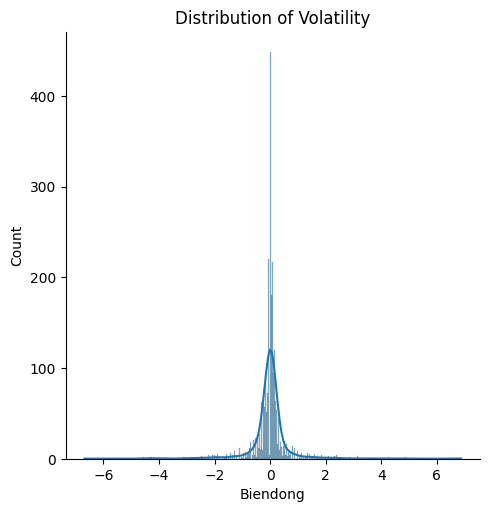

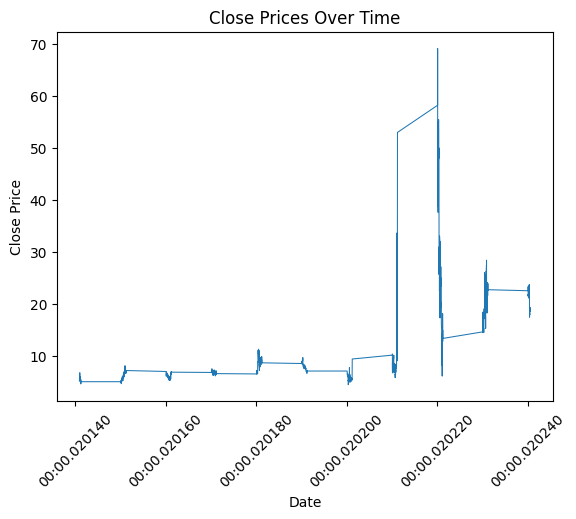

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Distribution of the target variable
sns.displot(data=data, x='Biendong', kde=True)
plt.title('Distribution of Volatility')
plt.show()

# Line plot of close prices over time
sns.lineplot(data=data, x='<DTYYYYMMDD>', y='<Close>', linewidth = 0.75)
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()


## 2. Data Preprocessing
### Data cleaning

In [ ]:
# check for missing values
data.isnull().sum()

<Ticker>        0
<DTYYYYMMDD>    0
<Open>          0
<High>          0
<Low>           0
<Close>         0
<Volume>        0
Biendong        0
dtype: int64

In [ ]:
# check for duplicate rows
data.duplicated().sum()

# drop duplicate rows
data.drop_duplicates(inplace=True)

C:\Users\QUI\AppData\Local\Temp\ipykernel_17964\1109850505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


### Add a volatility column to the dataset

## 3. Training the dataset

### Select the futures

In [ ]:
data.columns

Index(['<Ticker>', '<DTYYYYMMDD>', '<Open>', '<High>', '<Low>', '<Close>',
       '<Volume>', 'Biendong'],
      dtype='object')

In [ ]:
features = ['<Open>','<High>','<Low>','<Close>','<Volume>']

### Splitting data set into X and Y

In [ ]:
X = data[features]
Y = data['Biendong']

### X,Y -> X_train, Y_train, X_valid, Y_valid

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid =  train_test_split(X,Y, train_size=0.8,test_size=0.2, random_state=0)

### Traning Machine learning model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)

In [ ]:
# Fit training data into model
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_pre = dt_model.predict(x_valid.head())
y_pre

array([-0.109 , -3.1403,  0.4   ,  0.    ,  0.    ])

In [ ]:
pd.DataFrame({"y": y_valid.head(), "y_predict:": y_pre})

,y,y_predict:
236336,0.0748,-0.1090
134817,-0.4486,-3.1403
35759,1.7000,0.4000
418352,0.0000,0.0000
350208,-0.1256,0.0000


### Predict with new input

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x_train,y_train)


RandomForestRegressor(random_state=1)

In [ ]:
rf_valid_pre = rf_model.predict(x_valid)

In [ ]:
rf_model.predict([[114,115.5,113.6,115,83260]])

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.583331])